In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../../data/fortnite_players_stats_updated.csv')


In [5]:
# Clean up the column names to remove spaces
df.rename(columns={'Solo kills': 'Solo_kills', 'Solo minutesPlayed': 'Solo_minutes_played'}, inplace=True)


# Using `scikit-learn`

In [7]:
# Define the independent variable (X) and dependent variable (y)
# Note: scikit-learn expects X to be a 2D array, so we use double brackets
X = df[['Solo_minutes_played']]
y = df['Solo_kills']

In [8]:
# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Print the R-squared value
print(f"R-squared: {model.score(X, y):.2f}")

# Print the coefficient and intercept
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

R-squared: 0.36
Coefficient (slope): 0.19
Intercept: 3549.18


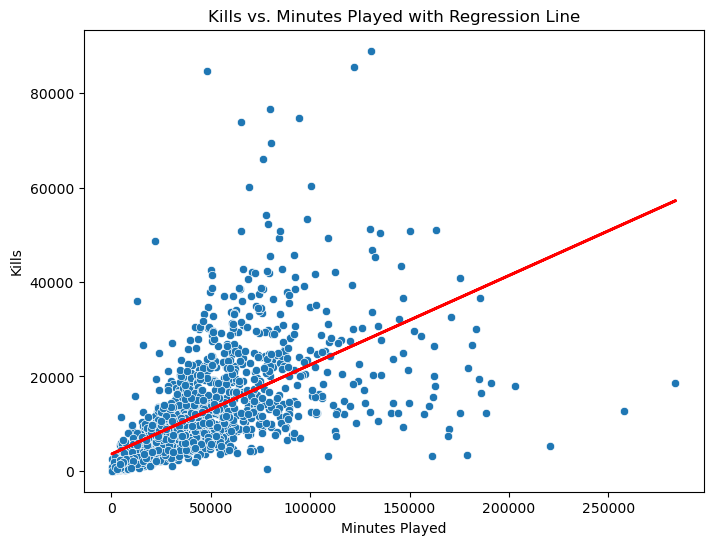

In [9]:
# Plot the regression line to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Solo_minutes_played', y='Solo_kills', data=df)
plt.plot(df['Solo_minutes_played'], model.predict(X), color='red', linewidth=2)
plt.title('Kills vs. Minutes Played with Regression Line')
plt.xlabel('Minutes Played')
plt.ylabel('Kills')
plt.show()

In [10]:
# Make a prediction for a new value
predicted_kills = model.predict(pd.DataFrame([[60]], columns=['Solo_minutes_played']))
print(f"Predicted kills for 60 minutes played: {predicted_kills[0]:.2f}")

Predicted kills for 60 minutes played: 3560.53


# Using `statsmodels`

In [11]:
model = smf.ols('Solo_kills ~ Solo_minutes_played', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Solo_kills   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     813.3
Date:                Wed, 03 Sep 2025   Prob (F-statistic):          4.58e-142
Time:                        15:44:53   Log-Likelihood:                -15120.
No. Observations:                1435   AIC:                         3.024e+04
Df Residuals:                    1433   BIC:                         3.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3549.1762    

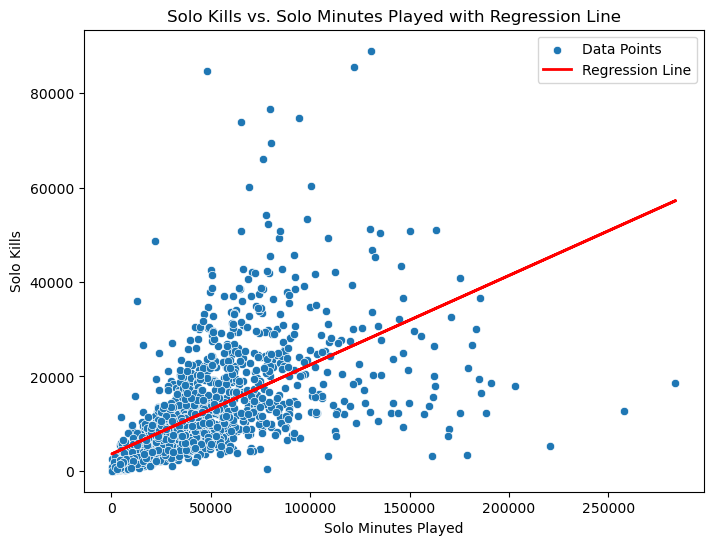

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Solo_minutes_played', y='Solo_kills', data=df, label='Data Points')

# Plot the regression line
# We use the model's intercept (model.params.iloc[0]) and coefficient (model.params.iloc[1])
plt.plot(df['Solo_minutes_played'], model.params.iloc[0] + model.params.iloc[1] * df['Solo_minutes_played'], color='red', linewidth=2, label='Regression Line')

plt.title('Solo Kills vs. Solo Minutes Played with Regression Line')
plt.xlabel('Solo Minutes Played')
plt.ylabel('Solo Kills')
plt.legend()
plt.show()